<a href="https://colab.research.google.com/github/javierber/colab_proj_repo/blob/main/Airline_Satisfication_Project_2_Part_3_(Core)_Update2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

#**Airline Passenger Satisfication**
______________________________________


#**Data Dictionary**

| FEATURES | DESCRIPITONS|
|--------------|-------------|
|Gender | Gender of the passengers (Female, Male)|
|Customer Type | The customer type (**Loyal customer**, **Disloyal customer**)|
|Age | The actual age of the passengers |
|Type of Travel | Purpose of the flight of the passengers (**Personal Travel**, **Business Travel**)|
|Class |Travel class in the plane of the passengers (**Business**, **Eco**, **Eco Plus**)|
|Flight distance | The flight distance of this journey |
|Inflight wifi service | Satisfaction level of the inflight wifi service (**0**:Not Applicable; **1-5**)|
|Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient |
|Ease of Online booking | Satisfaction level of online booking|
|Gate location |Satisfaction level of Gate location |
|Food and drink|Satisfaction level of Food and drink|
|Online boarding|Satisfaction level of online boarding|
|Seat comfort|Satisfaction level of Seat comfort|
|Inflight entertainment|Satisfaction level of inflight entertainment|
|On-board service|Satisfaction level of On-board service|
|Leg room service|Satisfaction level of Leg room service|
|Baggage handling|Satisfaction level of baggage handling|
|Check-in service|Satisfaction level of Check-in service|
|Inflight service|Satisfaction level of inflight service|
|Cleanliness|Satisfaction level of Cleanliness|
|Departure Delay in Minutes|Minutes delayed when departure|
|Arrival Delay in Minutes|Minutes delayed when Arrival|
|Satisfaction|Airline satisfaction level(**Satisfaction**, **Neutral or Dissatisfaction**)|

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

# 1) Source of data
Kaggle - Train.csv

In [1]:
#IMPORT
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#import necessary tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, make_column_transformer

#import accuracy, precision, recall, classification report, and confusion matrixon scoreing function
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [2]:
#LOAD DATA
file = '/content/sample_data/AirlineTrain.csv'
df = pd.read_csv(file, header=0)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

#2) Brief description of data
This dataset compromises of Airline Satisfaction Survey Results from Kaggle. We will be using the Airline Passenger Satisfaction dataset to prepare Data Analysis and Visualizations.


# 3) What is the target?
Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# 4) Is this a classification or regression problem?

We will be using Classification to Predict Airline Passenger Satisfaction

# 5) How many features?


In [4]:
print(f'Features: \n\n {df.shape[1]}')

Features: 

 23


# 6) How many rows of data.

In [5]:
print(f'Rows: \n\n {df.shape[0]}')

Rows: 

 103904


# Part 2
Project 2 - Part 2 (Core) Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

-clearly commented all of your cleaning steps and described any decisions you made (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.)

Note that you should start working on your in depth EDA and making multivariate visuals for the upcoming part 3 of this assignment once you have submitted all tasks and your belt exam for this stack.

Commit your file to your Github repository and submit the link below.

#7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
Primary issue could arise around the missing values for the column ['Arrival Delay in Minutes'], which is only 0.3%  of the dataset.

In [6]:
print("#"*40, "\n", "Dupes : \n\n", df.duplicated().sum()) #Are there duplicates? If so, drop any duplicates.
print("#"*40, "\n", "Missing values :\n\n", df.isnull().sum().sort_values(ascending=False))
print("#"*40, "\n", "Percent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) #looking at columsn with most missing values
print("#"*40, "\n", "Unique values  :\n\n", df.nunique()) #count of unique values
print("#"*40)
print("#"*40, "\n", "Dtype Info : \n\n", df.info()) #dtype info

######################################## 
 Dupes : 

 0
######################################## 
 Missing values :

 Arrival Delay in Minutes             310
satisfaction                           0
Food and drink                         0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Mi

In [7]:
#Checking balance and consistency
df['Gender'].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [8]:
#CHecking summary of ratings
df['Baggage handling'].value_counts()

4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64

In [9]:
#Reviewing the data for consideration later for imputation
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [10]:
#Reviewing some inconsistency in Customer Type.
df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [11]:
#Changing the values in this column to properly reflect Frequent Fliers (Loyal Customer) vs Non-Frequent Fliers (Disloyal Customer) and converting to binary
df['Customer Type'] = df['Customer Type'].replace({'disloyal Customer':'Non-Frequent Flier' , 'Loyal Customer':'Frequent Flier'})
df['Customer Type'] = df['Customer Type'].replace({'Non-Frequent Flier':0, 'Frequent Flier':1})
df['Customer Type'].value_counts()


1    84923
0    18981
Name: Customer Type, dtype: int64

# Overall assestment of the dataset
# ____________________________________________________________________


➿ -  No Dupes present in the datasets

⛔ 
-  Will be imputing the missing 3% data for column **Arrival Delay in Minutes**
-  Found inconsistency in the **Customer Type** column and address it by changing the types to proper reflect the customers and also converted to binary with "Frequent Fliers" are 1 and "Non-Frequent Fliers" are 0
-  Dropped the following columns: 
1.   **Unnamed: 0**
2.   **id**

#_____________________________________________________________________





In [12]:
#Check for Balance of target data
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

#⚖ Data is balanced

In [13]:
#Separate X and Y and train, test, split
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

#Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# LIGHT EDA

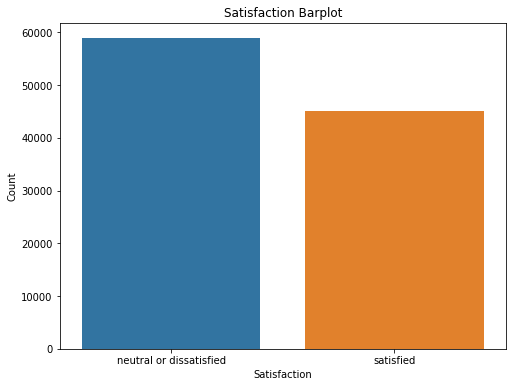

In [14]:
#Initial Univariate 
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df,  x='satisfaction')
plt.title('Satisfaction Barplot')
plt.xlabel('Satisfaction')
plt.ylabel('Count');

# 😠 🙅 
Albeit we can't 100% deduce just yet how dissatisfied or neutral the passengers are within this visual, but what initial univariate visual clearly shows that the majority of the folks surveyed are either neutral or dissatisfied with current airline service. 

**NOTE**:  *Would suggested that a future survey include a 3rd option and split the "Neutral"  and "Dissatisfied" options.  So that we can clearing see the breakdown of this feature.*

In [15]:
df.describe().T
#Table formatting-https://stackoverflow.com/questions/54734957/difference-between-transpose-and-t-in-pandas

,count,mean,std,min,25%,50%,75%,max
Customer Type,103904.0,0.817322,0.386404,0.0,1.0,1.0,1.0,1.0
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0


#📚:


1.   **[AGE]** has a an outlier that is 7yrs old.  As the youngest in the survey
2.   **[DEPARTURE DELAY]** and **[ARRIVAL DELAY]** columns show 50% of their values are "0" meaning there were no delays.  But the **[ARRIVAL]** column has missing data and both the jump double digits (12 & 13mins) in the 75% percentile and close to **1600 mins in the MAX**, which was a **26.7hr delay**. 🕒 👎
3.   The numerical columns all use an ordinal rating of 📏

|RATING | DEFINITION |
|-------|-----------|
|0 |**Not Applicable**|
|1-5 |**With 5 being “excellent”**|

🆗 😐
4.   **Most all numerical features passengers were seemed content with their service w/ ratings a little higher than nuetral.**









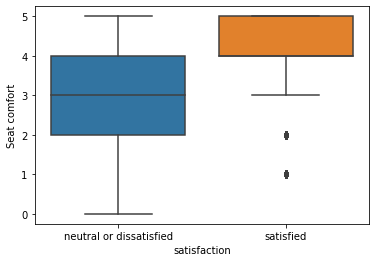

In [16]:
#Multivariate visual
sns.boxplot(data=df, x='satisfaction', y='Seat comfort');

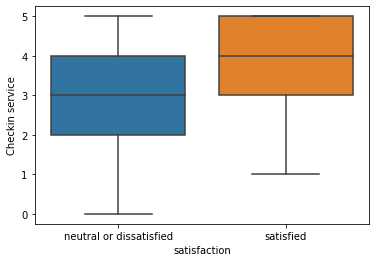

In [17]:
sns.boxplot(data=df, x='satisfaction', y='Checkin service');



# 💺 🎫
Of the **neutral or dissatisfied** surveyed passengers rate Seatting accommodations and Checkin Service with 3 (avg).   We can also see that based on the initial barplot, the majority of those who were 

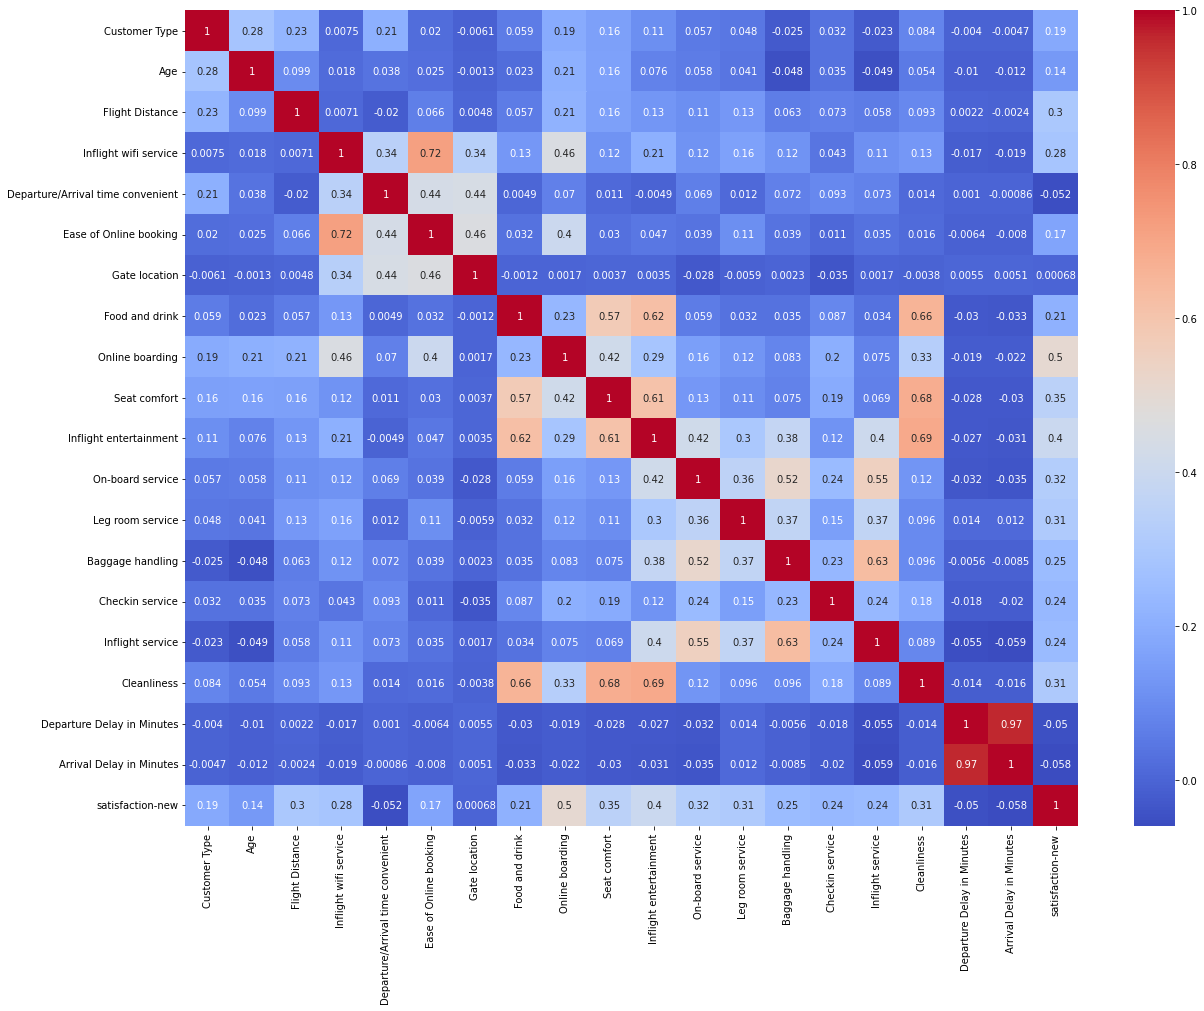

In [18]:
#Find correlation w/ Target, thus converting Satisfaction to ordinal numeration (0:neutral or dissatisfied, 1:satisfied)  
df['satisfaction-new'] = df['satisfaction'].replace({'neutral or dissatisfied':0 , 'satisfied':1})

# Correlation Visual
plt.figure(figsize= (20, 15))
sns.heatmap(df.corr(), annot =True, cmap='coolwarm');

# 🛫 🎫 💺 🥳
New correlation data show that **[ONLINE BOARDING]** and **[INFLIGHT ENTERTAINMENT]** has a moderate correlation to passenger **[SATISFACTION]**

|

💻
Also, another strong correlation between those who found **[EASE OF ONLINE BOOKING]** vs **[INFLIGHT WIFI SERVICE]**

|

🛬 🛫 - Very important note that a negative correlation of those **[ARRIVAL DELAY]** and **[DEPARTURE DELAY]** 

In [19]:
pip install dython

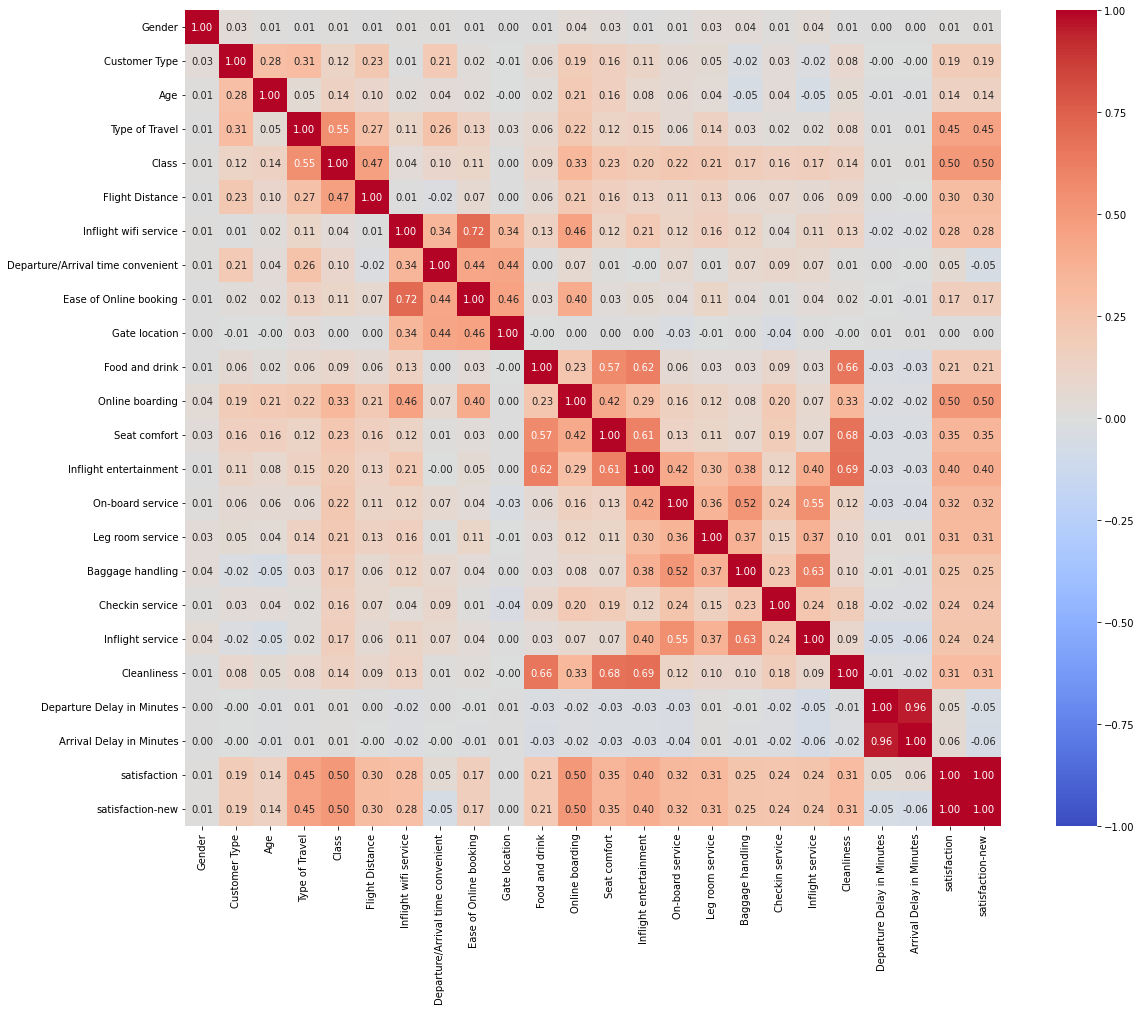

In [20]:
from dython.nominal import associations
associations(figsize=(20,15), dataset=df, cmap='coolwarm');

#Additional Heatmap for better correlation

# 🛫 🎫 💺 🥳 🏖
New correlation data show that **[ONLINE BOARDING]**, **[CLASS]**, followed closely by **[INFLIGHT ENTERTAINMENT]** and **[TYPE OF TRAVEL]** all show a moderate correlation to passenger **[SATISFACTION]**
